In [20]:
### NUMERICAL SIMULATOR ###
import scipy.integrate
def numerical_schrodinger(initials, ts, grid_size=100, grid_length=1):
    psi0 = initials[0:2, :, :]    
    v = initials[2, :, :]
    shape = psi0.shape
    flattened_shape = np.prod(shape)
    
    # flatten
    psi0 = np.reshape(psi0, flattened_shape)
    
    # construct laplacian operator and then Hamiltonian
    dx = grid_length/grid_size
    D2 = -2*np.eye(grid_size)
    for i in range(grid_size-1):
        D2[i,i+1] = 1 
        D2[i+1,i] = 1
    
    KE = -0.5*D2/(dx**2)
 
    def dpsi_dt(t,y):        
        y = np.reshape(y, shape)
        psi_real = y[0]
        psi_imag = y[1]
        dpsi_real = np.expand_dims(-KE@psi_imag - v*psi_imag, 0)
        dpsi_imag = np.expand_dims(KE@psi_real + v*psi_real, 0)
        return np.reshape(np.concatenate((dpsi_real, dpsi_imag), axis=0), flattened_shape)
    
    #sol = scipy.integrate.odeint(dpsi_dt, psi0, ts) # CHANGE TO SOLVE_IVP
    sol = scipy.integrate.solve_ivp(dpsi_dt, t_span=[0,np.max(ts)], y0=psi0, t_eval=ts, method="RK23")
    
    print(sol.y.shape)
    print(shape+(len(ts),))
    
    return np.reshape(sol.y, shape+(len(ts),))

(200, 3)
(2, 100, 1, 3)


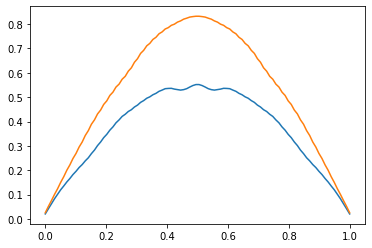

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def psi0(x):
    real = np.sin(np.pi*x)
    imag = 0*x
    return real, imag

def v0(x):
    return 0*x

xs = np.linspace(0,1,100)
p0_real, p0_imag = psi0(xs)

initials = np.zeros((3, 100, 1))
initials[0, :, 0] = p0_real.T
initials[1, :, 0] = p0_imag.T
initials[2, :, 0] = p0_real.T*0

ts = [0,0.1,0.2]

num_y = numerical_schrodinger(initials, ts, grid_size=100)

num_ys_real = num_y[0,:,0,:]
num_ys_imag = num_y[1,:,0,:]

plt.figure()
plt.plot(xs,num_ys_real[:,2])
plt.plot(xs,num_ys_imag[:,2])